## turn stats

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [13]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
wind_grid = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')

In [9]:
geo_tools.find_closest_model_point(-123.24, 48.69, wind_grid['longitude'][:]-360, wind_grid['latitude'][:],
                                   grid = 'GEM2.5')

(116, 150)

In [10]:
wind_data = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [17]:
time_slice = slice('2015-01-01 00:00:00', '2019-01-01 00:00:00')

In [18]:
u_winds = wind_data.u_wind.isel(gridY=116, gridX=150).sel(time=time_slice).data
v_winds = wind_data.v_wind.isel(gridY=116, gridX=150).sel(time=time_slice).data

In [22]:
times = wind_data.time.sel(time=time_slice).data

In [23]:
times.shape

(35065,)

In [24]:
u_winds.shape

(35065,)

In [28]:
wind_speed, wind_dir = wind_tools.wind_speed_dir(u_winds, v_winds)

# below is from old notebook 

In [3]:
pickle_in1 = open("/home/abhudia/Desktop/Wind speed/3points/winds_turn2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/Wind speed/3points/winds_turn2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/Wind speed/3points/winds_turn2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/Wind speed/3points/winds_turn2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

In [4]:
two = np.append(example1, example2)

In [5]:
three = np.append(two, example3)
full = np.append(three, example4)

In [6]:
wnd_avg = np.array([])
wnd_min = np.array([])
wnd_max = np.array([])
wnd_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    wnd_avg = np.append(wnd_avg, full[start:end].mean())
    wnd_min = np.append(wnd_min, full[start:end].min())
    wnd_max = np.append(wnd_max, full[start:end].max())
    wnd_std = np.append(wnd_std, full[start:end].std())

In [7]:
pickle_in1 = open("/home/abhudia/Desktop/current speed/hourly/mag2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/current speed/hourly/mag2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/current speed/hourly/mag2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/current speed/hourly/mag2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

In [8]:
two = np.append(example1[:,143,240], example2[:,143,240])
three = np.append(two, example3[:,143,240])
fullc = np.append(three, example4[:,143,240])
fullc.shape

(35064,)

In [37]:
dates2 = np.array([datetime.datetime(2015,1,1,0,30) + datetime.timedelta(hours = i) for i in range(35064)])

In [39]:
month_of_data = np.array([dates2[a].month for a in range(35064)])

In [9]:
cur_avg = np.array([])
cur_min = np.array([])
cur_max = np.array([])
cur_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    cur_avg = np.append(cur_avg, fullc[start:end].mean())
    cur_min = np.append(cur_min, fullc[start:end].min())
    cur_max = np.append(cur_max, fullc[start:end].max())
    cur_std = np.append(cur_std, fullc[start:end].std())

In [10]:
pickle_in1 = open("/home/abhudia/Desktop/salinity/3points/turn2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/salinity/3points/turn2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/salinity/3points/turn2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/salinity/3points/turn2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

two = np.append(example1, example2)
three = np.append(two, example3)
fulls = np.append(three, example4)

In [11]:
sal_avg = np.array([])
sal_min = np.array([])
sal_max = np.array([])
sal_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    sal_avg = np.append(sal_avg, fulls[start:end].mean())
    sal_min = np.append(sal_min, fulls[start:end].min())
    sal_max = np.append(sal_max, fulls[start:end].max())
    sal_std = np.append(sal_std, fulls[start:end].std())

In [46]:
monthly_sal_avg = np.array([])
monthly_cur_avg = np.array([])
monthly_wnd_avg = np.array([])
for a in range(1,13):
    monthly_sal_avg = np.append(monthly_sal_avg, fulls[month_of_data==a].mean())
    monthly_cur_avg = np.append(monthly_cur_avg, fullc[month_of_data==a].mean())
    monthly_wnd_avg = np.append(monthly_wnd_avg, full[month_of_data==a].mean())

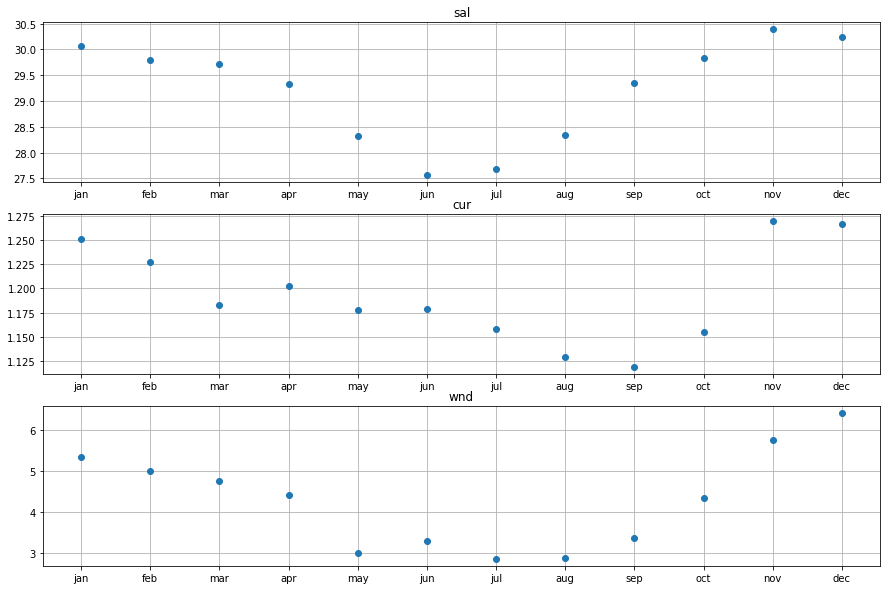

In [50]:
months = np.array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(months, monthly_sal_avg, 'o')
ax[0].set_title('sal')

ax[1].plot(months, monthly_cur_avg, 'o')
ax[1].set_title('cur')

ax[2].plot(months, monthly_wnd_avg, 'o')
ax[2].set_title('wnd');
for ax in ax:
    ax.grid(True);

In [12]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

dates = np.array([datetime.date(2015,1,1) + datetime.timedelta(i) for i in range(1450)])
dates.shape

(1450,)

In [13]:
print("overall mean for salinity = " + str(sal_avg.mean()))
print("overall mean for current = " + str(cur_avg.mean()))
print("overall mean for wind = " + str(wnd_avg.mean()))

overall mean for salinity = 29.205293358112204
overall mean for current = 1.1915175751159932
overall mean for wind = 4.272028153284426


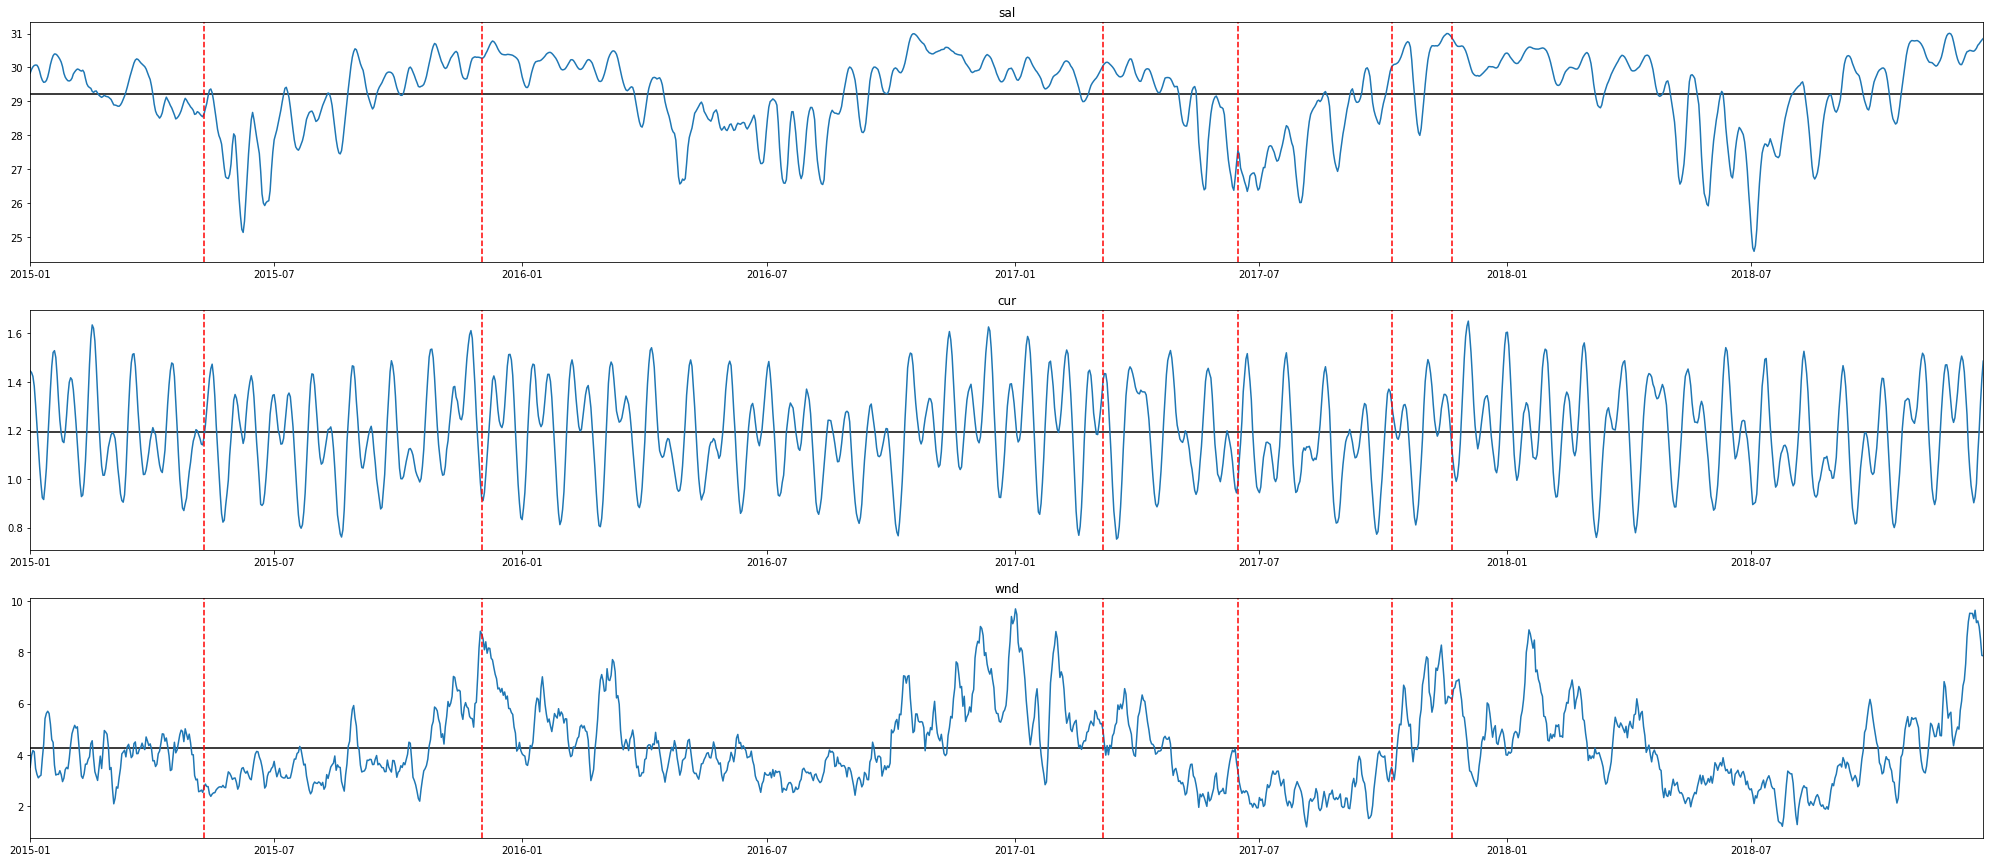

In [14]:
fig, ax = plt.subplots(3,1, figsize = (35,15))
ax[0].plot(dates, sal_avg)
ax[0].set_title('sal')
ax[0].hlines(fulls.mean(), dates[0], dates[-1])

ax[1].plot(dates,cur_avg)
ax[1].hlines(fullc.mean(), dates[0], dates[-1])
ax[1].set_title('cur')

ax[2].plot(dates,wnd_avg)
ax[2].set_title('wnd')
ax[2].hlines(full.mean(), dates[0], dates[-1])
for ax in ax:
    ax.set_xlim(dates[0], dates[-1])
    ax.axvline(datetime.date(2015,12,2), color='r', ls='--')
    ax.axvline(datetime.date(2017,3,7), color='r', ls='--')
    ax.axvline(datetime.date(2017,10,7), color='r', ls='--')
    ax.axvline(datetime.date(2015,5,10), color='r', ls='--')
    ax.axvline(datetime.date(2017,6,15), color='r', ls='--')
    ax.axvline(datetime.date(2017,11,21), color='r', ls='--');
#fig.savefig('/home/vdo/Pictures/turn-choices.png', bbox_inches='tight');

##  15dec16 ish Spring, lower wind and higher stratification

(44,)


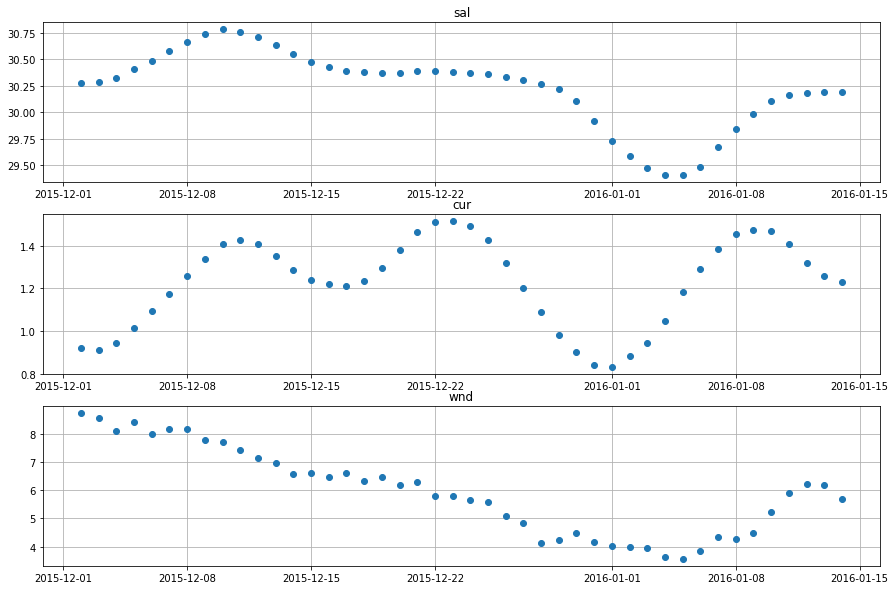

In [23]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(dates[(dates < datetime.date(2016,1,15)) & (dates > datetime.date(2015,12,1))],
           sal_avg[(dates < datetime.date(2016,1,15)) & (dates > datetime.date(2015,12,1))], 'o')
ax[0].set_title('sal')
ax[1].plot(dates[(dates < datetime.date(2016,1,15)) & (dates > datetime.date(2015,12,1))],
           cur_avg[(dates < datetime.date(2016,1,15)) & (dates > datetime.date(2015,12,1))], 'o')
ax[1].set_title('cur')
ax[2].plot(dates[(dates < datetime.date(2016,1,15)) & (dates > datetime.date(2015,12,1))],
           wnd_avg[(dates < datetime.date(2016,1,15)) & (dates > datetime.date(2015,12,1))], 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');
print(wnd_avg[(dates < datetime.date(2016,1,15)) & (dates > datetime.date(2015,12,1))].shape)

### You wanted two weeks after 02dec15 but if we go into 04jan16, we get below average winds, slightly above average salinity and properly spring tides

# 01jul17ish Spring, lower wind and higher stratification

(29,)


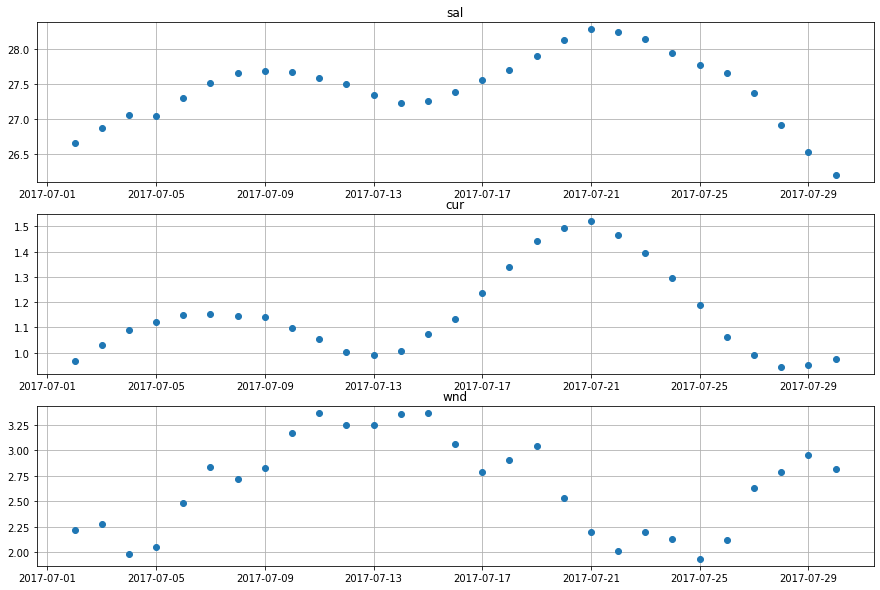

In [25]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(dates[(dates < datetime.date(2017,7,31)) & (dates > datetime.date(2017,7,1))],
           sal_avg[(dates < datetime.date(2017,7,31)) & (dates > datetime.date(2017,7,1))], 'o')
ax[0].set_title('sal')
ax[1].plot(dates[(dates < datetime.date(2017,7,31)) & (dates > datetime.date(2017,7,1))],
           cur_avg[(dates < datetime.date(2017,7,31)) & (dates > datetime.date(2017,7,1))], 'o')
ax[1].set_title('cur')
ax[2].plot(dates[(dates < datetime.date(2017,7,31)) & (dates > datetime.date(2017,7,1))],
           wnd_avg[(dates < datetime.date(2017,7,31)) & (dates > datetime.date(2017,7,1))], 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');
print(wnd_avg[(dates < datetime.date(2017,7,31)) & (dates > datetime.date(2017,7,1))].shape)

### 21jul17 has low winds, slightly below average salinity, and is during the spring tides

# Add ~12/2016 for max spring tide, higher-ish winds and higher salinity

(60,)


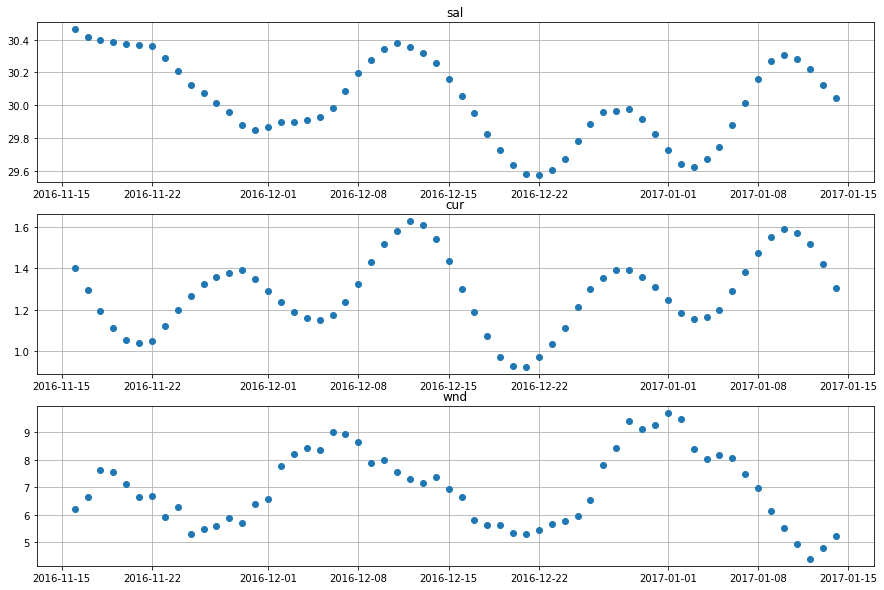

In [28]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(dates[(dates < datetime.date(2017,1,15)) & (dates > datetime.date(2016,11,15))],
           sal_avg[(dates < datetime.date(2017,1,15)) & (dates > datetime.date(2016,11,15))], 'o')
ax[0].set_title('sal')
ax[1].plot(dates[(dates < datetime.date(2017,1,15)) & (dates > datetime.date(2016,11,15))],
           cur_avg[(dates < datetime.date(2017,1,15)) & (dates > datetime.date(2016,11,15))], 'o')
ax[1].set_title('cur')
ax[2].plot(dates[(dates < datetime.date(2017,1,15)) & (dates > datetime.date(2016,11,15))],
           wnd_avg[(dates < datetime.date(2017,1,15)) & (dates > datetime.date(2016,11,15))], 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');
print(wnd_avg[(dates < datetime.date(2017,1,15)) & (dates > datetime.date(2016,11,15))].shape)

### 12dec16 has a decent max spring tide with higher salinity and above average winds

### Correlation between wind speed and surface current speed

In [64]:
np.corrcoef(full, fullc)

array([[1.        , 0.03305829],
       [0.03305829, 1.        ]])

### Correlation between wind speed and surface salinity

In [65]:
np.corrcoef(full, fulls)

array([[1.        , 0.30265542],
       [0.30265542, 1.        ]])

### Correlation between curface salinity and surface current speed

In [66]:
np.corrcoef(fulls, fullc)

array([[1.        , 0.09100318],
       [0.09100318, 1.        ]])